IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
from numpy import ndarray
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

Converting Image to Numpy array

In [2]:
img = Image.open('dog.jpg')
original_img = np.array(img)
original_img

array([[[ 57,  53,  41],
        [ 60,  56,  44],
        [ 62,  58,  46],
        ...,
        [ 76,  70,  54],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 58,  54,  42],
        [ 59,  55,  43],
        [ 61,  57,  45],
        ...,
        [ 75,  69,  53],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 60,  56,  44],
        [ 58,  54,  42],
        [ 59,  55,  43],
        ...,
        [ 75,  69,  53],
        [ 75,  69,  53],
        [ 76,  70,  54]],

       ...,

       [[ 92,  85,  67],
        [ 93,  86,  68],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 93,  86,  68],
        [ 94,  87,  69],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 89,  82,  64],
        [ 89,  82,  64],
        [ 90,  83,  65],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]

Function to display Images

In [3]:
def display_img(image_array: ndarray, text: str = ''):
    plt.imshow(image_array, cmap='gray')

    if text != '':
        plt.title(text)

    plt.axis('off')
    return

def compare_img(*args):
    """
    Plots the images with the text

    Parameters:
    tuple: (image_array, text)
    (image_array(ndarray): Image array to be plotted
    text: Text to be displayed with the image)
    """
    num = len(args)
    plt.figure(figsize=(10,5*num))
    rows = (num+1)//2

    for i in range(num):
        if len(args[i]) == 2 and type(args[i][-1]) == str:
            image_arr = args[i][0]
            text = args[i][1]
        else:
            image_arr = args[i]
            text = ''

        plt.subplot(rows,2,i+1)
        display_img(image_arr, text)

    plt.tight_layout()
    plt.show()

    return

Cropping Image

<Figure size 1000x500 with 0 Axes>

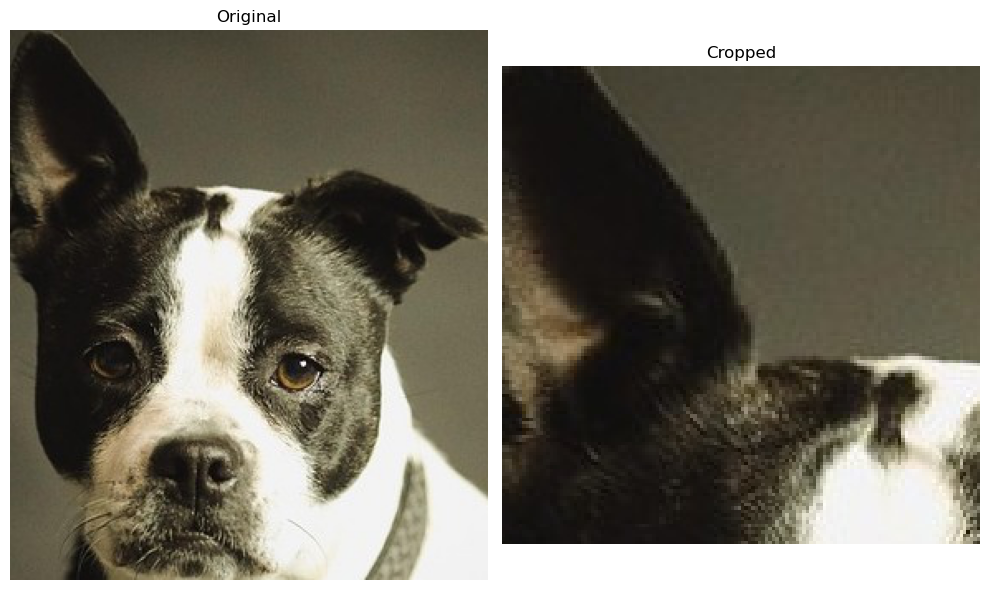

In [ ]:
x1, y1 = 10, 10
x2_1, y2_1 = 150, 150
x2_2, y2_2 = 200, 200

cropped_img_1 = original_img[y1:y2_1, x1:x2_1]
cropped_img_2 = original_img[y1:y2_2, x1:x2_2]

plt.figure(figsize=(10, 5))
compare_img((original_img, "Original"), (cropped_img_1, "Cropped"))

Rotate Image

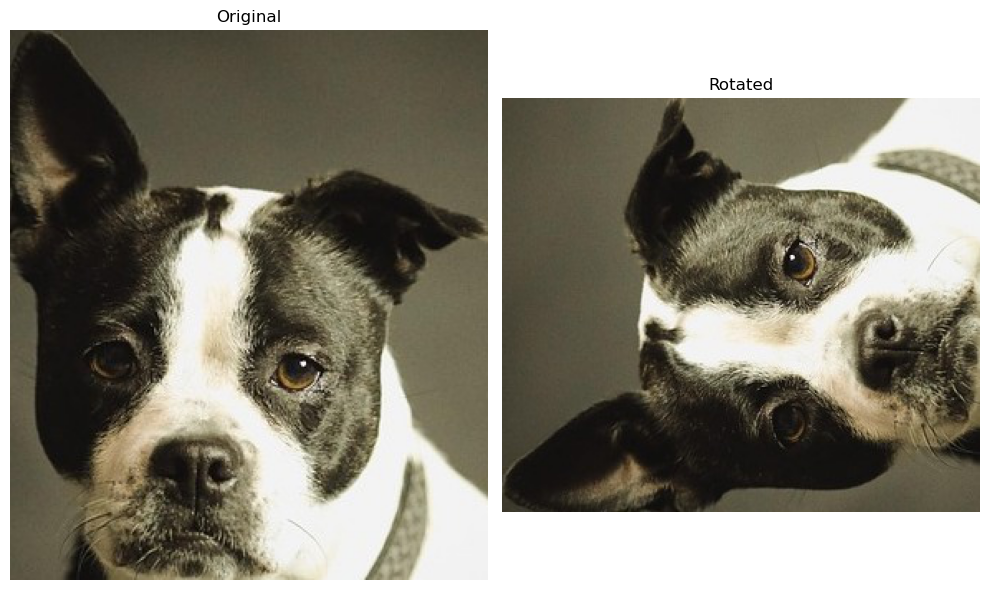

In [66]:
rotated_img = np.rot90(original_img)
compare_img((original_img, "Original"), (rotated_img,"Rotated"))


Flipping Image

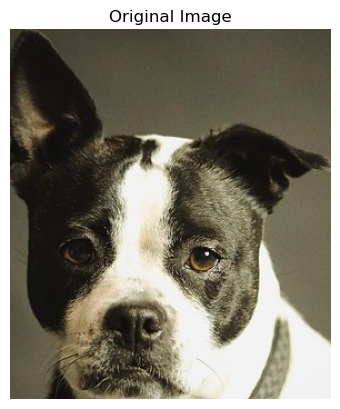

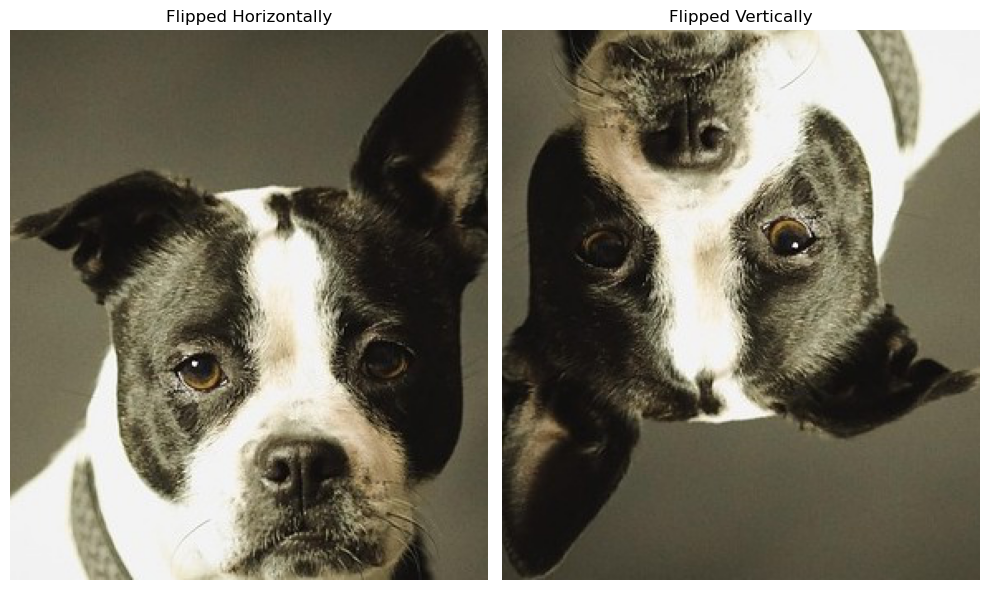

In [67]:
flip_horizontal_img = np.fliplr(original_img)
flip_vertical_img = np.flipud(original_img)

display_img(original_img, "Original Image")
compare_img((flip_horizontal_img, "Flipped Horizontally"), (flip_vertical_img, "Flipped Vertically"))

Negative of Image

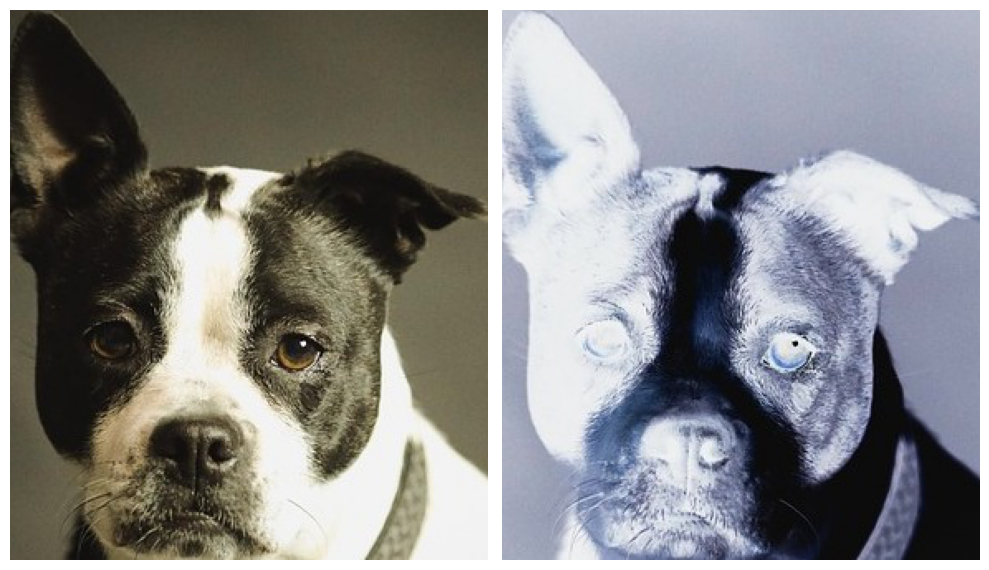

In [5]:
def is_rgb(image_array: ndarray) -> bool:
    if image_array.ndim < 3:
        return False
    else:
        return True

negative_img = 255 - original_img
compare_img(original_img, negative_img)

Binarizing an Image

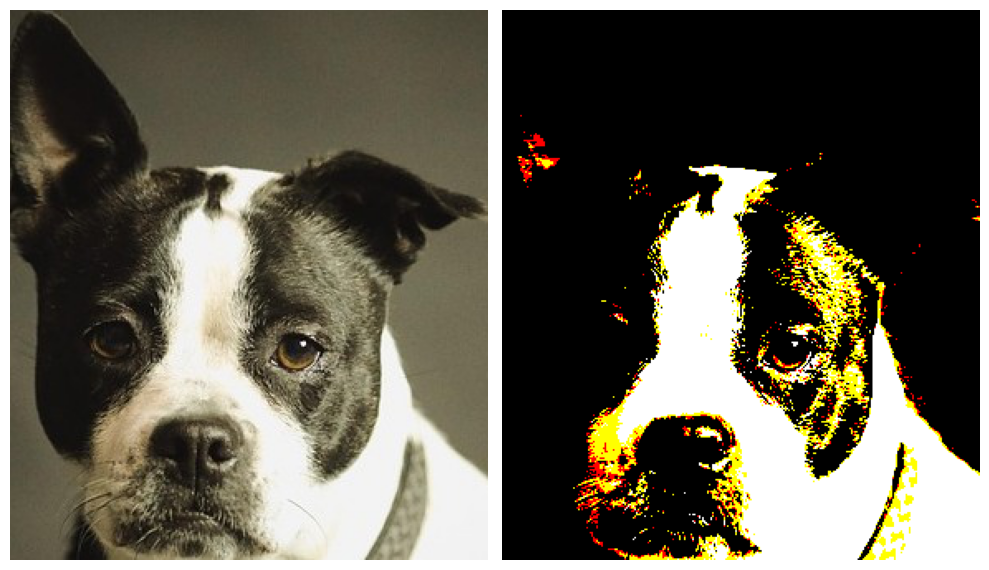

In [ ]:
threshold = 128

binarised_img = np.where(original_img < threshold, 0, 255)
compare_img(original_img, binarised_img)

Grayscaling an Image

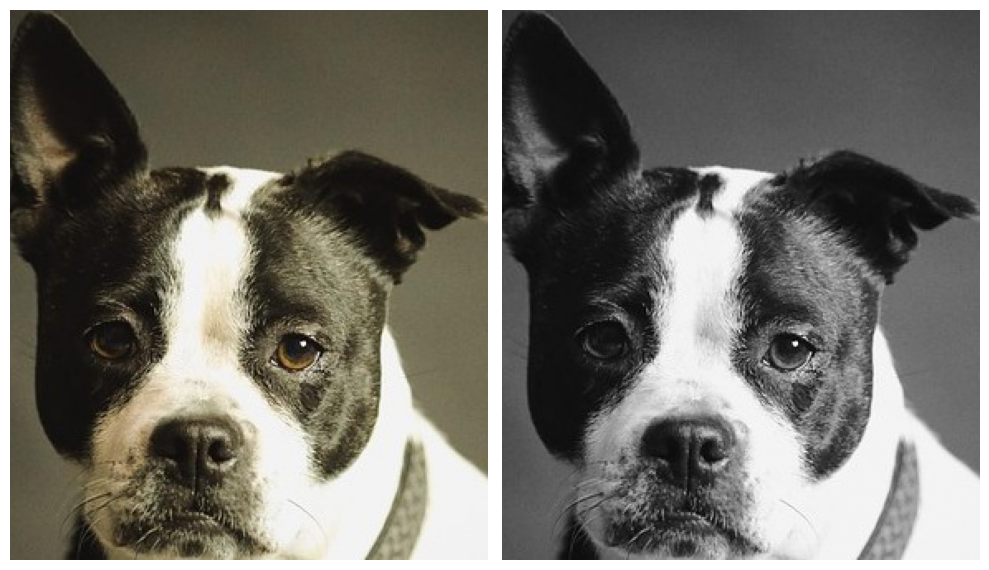

In [6]:
# Grayscale conversion formula: Y = 0.299*R + 0.587*G + 0.114*B
gray_convert_arr = np.array((0.299, 0.587, 0.114))
gray_img = np.dot(original_img, gray_convert_arr)

compare_img(original_img, gray_img)

Convolution

In [7]:
def convolve2d(image_array: ndarray, kernel: ndarray):
    kernel = np.flipud(np.fliplr(kernel))

    if is_rgb(image_array):
        return "RGB image. Use convolve3d instead"
    else:
        rows, columns = image_array.shape
        krows, kcols = kernel.shape
        padrows, padcols = krows//2, kcols//2

        output = np.zeros_like(image_array)
        padded_img = np.pad(image_array, ((padrows, padrows), (padcols, padcols)), 'constant', constant_values=0)

        for row in range(rows):
            for col in range(columns):
                region = padded_img[row:row+krows, col:col+kcols]
                output[row, col] = np.clip(np.sum(region*kernel), 0, 255)

        return output

def convolve3d(image_array: ndarray, kernel: ndarray):
    dimensions = image_array.ndim

    if dimensions > 3:
        return "Convolution not possible"

    if dimensions == 2:
        return convolve2d(image_array, kernel)
    
    else:
        channels = image_array.shape[-1]
        output = np.zeros_like(image_array)

        for c in range(channels):
            channel = image_array[:,:,c]
            output[:,:,c] = convolve2d(channel, kernel)
        
        return output
    

<Figure size 1000x500 with 0 Axes>

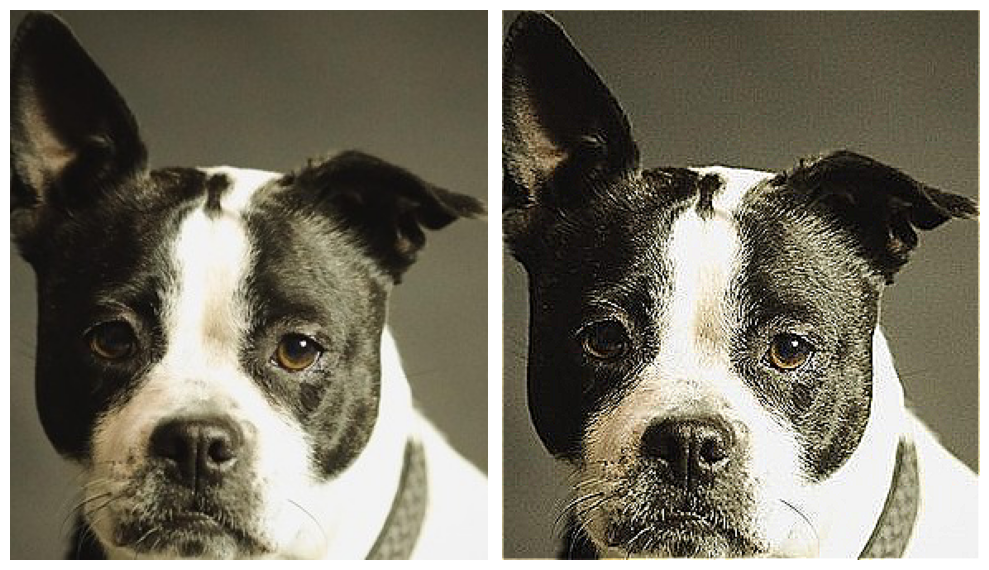

In [9]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpen_img = convolve3d(original_img, sharpen)

plt.figure(figsize=(10,5))
compare_img(original_img, sharpen_img)

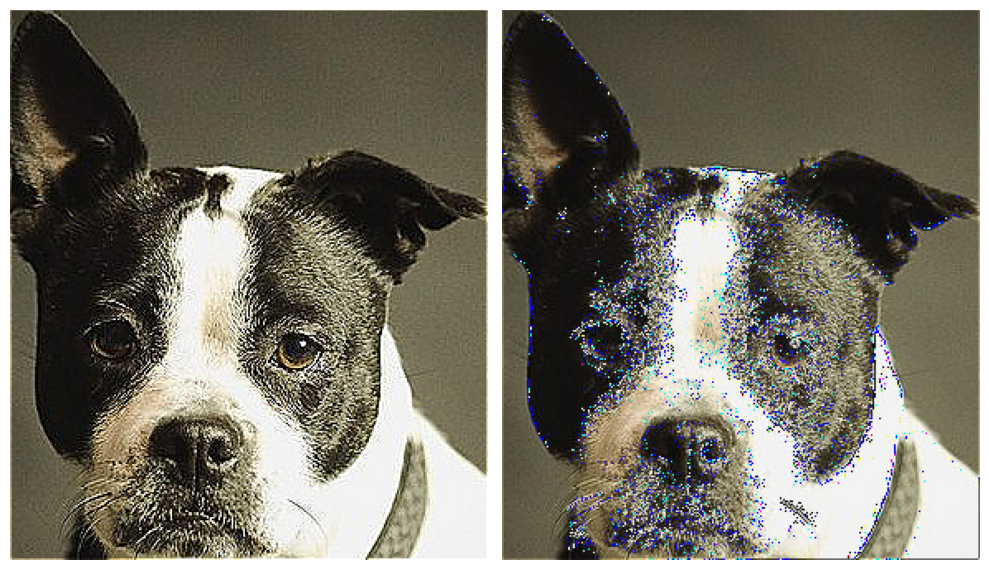

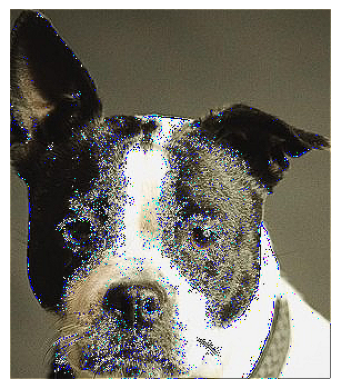

In [30]:
channel_r = convolve(original_img[:,:,0], sharpen, mode="constant", cval=0)
channel_g = convolve(original_img[:,:,1], sharpen, mode="constant", cval=0)
channel_b = convolve(original_img[:,:,2], sharpen, mode="constant", cval=0)

result_1 = np.clip(np.stack((channel_r, channel_g, channel_b), axis=-1), 0, 255).astype(np.uint8)
compare_img(sharpen_img, result_1)
display_img(result_1)

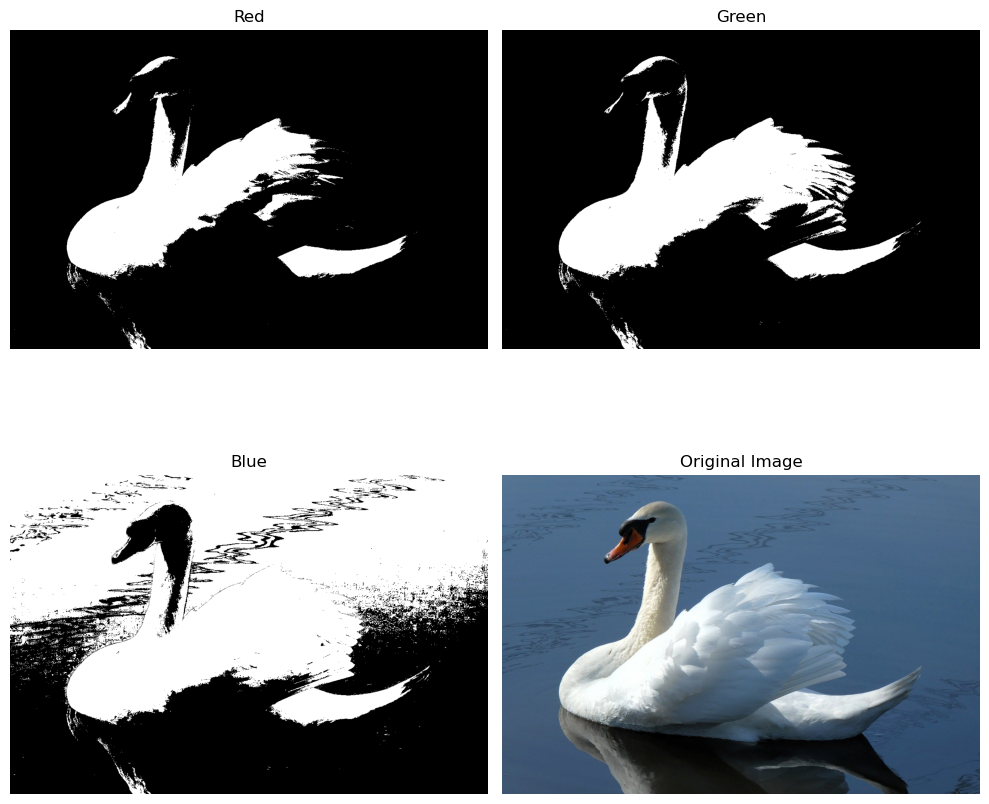

In [ ]:
red_binarised, green_binarised, blue_binarised = binarised_img[:,:,0:1], binarised_img[:, :, 1:2], binarised_img[:, :, 2:]
red_only, green_only, blue_only = red_binarised.squeeze(), green_binarised.squeeze(), blue_binarised.squeeze()

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
display_img(red_only, "Red")

plt.subplot(2,2,2)
display_img(green_only, "Green")

plt.subplot(2,2,3)
display_img(blue_only, "Blue")

plt.subplot(2,2,4)
display_img(original_img, "Original Image")

plt.tight_layout()
plt.show()

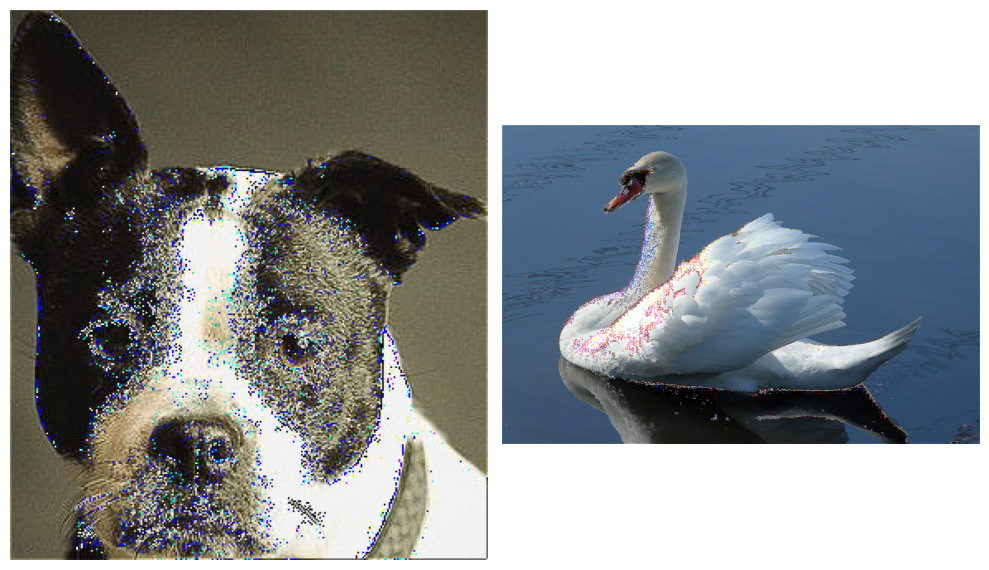

In [32]:
import numpy as np
from scipy.ndimage import convolve
from PIL import Image
import matplotlib.pyplot as plt

# Load the image in RGB mode
img = Image.open('swan.jpg').convert('RGB')
img_arr = np.array(img)

# Define sharpening kernel
sharpen = np.array([
    [ 0, -0.5,  0],
    [-0.5,  3, -0.5],
    [ 0, -0.5,  0]
])

# Create an empty array for result with float32 to prevent overflow
result = np.zeros_like(img_arr, dtype=np.float32)

# Apply convolution on each channel safely
for i in range(3):  # R, G, B
    result[:, :, i] = convolve(img_arr[:, :, i], sharpen, mode="constant", cval=0.0)

# Clip values to valid range and convert to uint8
result_2 = np.clip(result, 0, 255).astype(np.uint8)

compare_img(result_1, result_2)



In [33]:
arr_1 = np.linspace(1, 20, 30).reshape(5,3,2)
print(arr_1)
print(arr_1.shape)
print()

arr_2 = np.linspace(1, 10, 30).reshape(5,3,2)
print(arr_2)
print(arr_2[:,:,0].shape)

print(arr_1[4][0])

[[[ 1.          1.65517241]
  [ 2.31034483  2.96551724]
  [ 3.62068966  4.27586207]]

 [[ 4.93103448  5.5862069 ]
  [ 6.24137931  6.89655172]
  [ 7.55172414  8.20689655]]

 [[ 8.86206897  9.51724138]
  [10.17241379 10.82758621]
  [11.48275862 12.13793103]]

 [[12.79310345 13.44827586]
  [14.10344828 14.75862069]
  [15.4137931  16.06896552]]

 [[16.72413793 17.37931034]
  [18.03448276 18.68965517]
  [19.34482759 20.        ]]]
(5, 3, 2)

[[[ 1.          1.31034483]
  [ 1.62068966  1.93103448]
  [ 2.24137931  2.55172414]]

 [[ 2.86206897  3.17241379]
  [ 3.48275862  3.79310345]
  [ 4.10344828  4.4137931 ]]

 [[ 4.72413793  5.03448276]
  [ 5.34482759  5.65517241]
  [ 5.96551724  6.27586207]]

 [[ 6.5862069   6.89655172]
  [ 7.20689655  7.51724138]
  [ 7.82758621  8.13793103]]

 [[ 8.44827586  8.75862069]
  [ 9.06896552  9.37931034]
  [ 9.68965517 10.        ]]]
(5, 3)
[16.72413793 17.37931034]


In [84]:
arr[:,:][0]

array([[1.        , 2.68965517],
       [4.37931034, 6.06896552],
       [7.75862069, 9.44827586]])

In [104]:
0.299+0.587+0.114

0.9999999999999999